## Data Acquisition

-Importing libraries
-Reading car excel file
-getting first 5 rows 
-getting number of rows n columns 
-getting info abt the dataframe
-backing up the car data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')


In [2]:
carData=pd.read_csv('car.csv')

In [3]:
carData.head()

name   company  year          Price  \
0    Hyundai Santro Xing XO eRLX Euro III   Hyundai  2007         80,000   
1                 Mahindra Jeep CL550 MDI  Mahindra  2006       4,25,000   
2              Maruti Suzuki Alto 800 Vxi    Maruti  2018  Ask For Price   
3  Hyundai Grand i10 Magna 1.2 Kappa VTVT   Hyundai  2014       3,25,000   
4        Ford EcoSport Titanium 1.5L TDCi      Ford  2014       5,75,000   

   kms_driven fuel_type  
0  45,000 kms    Petrol  
1      40 kms    Diesel  
2  22,000 kms    Petrol  
3  28,000 kms    Petrol  
4  36,000 kms    Diesel

In [4]:
carData.shape

(892, 6)

In [5]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
bs=carData.copy()

## Data Preparation

- Name of car is attached at the company.
- Year column has non numeric values
- Price column has non numeric values such as "Ask for price" and have commas in between integers
- kms_driven column has "kms" 
- fuel_type column has null values

#### removing non numeric values

In [7]:
carData=carData[carData['year'].str.isnumeric()]

#### changing data type to integer

In [8]:
carData['year']=carData['year'].astype(int)

#### Removing ask for price phrase

In [9]:
carData=carData[carData['Price']!='Ask For Price']

#### Removing commas and converting to int

In [10]:
carData['Price']=carData['Price'].str.replace(',','').astype(int)

####  Removing "kms" and commas

In [11]:
carData['kms_driven']=carData['kms_driven'].str.split().str.get(0).str.replace(',','')

#### Removing non numeric values

In [12]:
carData=carData[carData['kms_driven'].str.isnumeric()]

In [13]:
carData['kms_driven']=carData['kms_driven'].astype(int)

#### Removing null values

In [14]:
carData=carData[~carData['fuel_type'].isna()]

In [15]:
carData.shape

(816, 6)

In [16]:
carData['name']=carData['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

#### Index of data resetted back

In [17]:
carData=carData.reset_index(drop=True)

#### Cleaned Data

In [18]:
carData

name   company  year   Price  kms_driven fuel_type
0       Hyundai Santro Xing   Hyundai  2007   80000       45000    Petrol
1       Mahindra Jeep CL550  Mahindra  2006  425000          40    Diesel
2         Hyundai Grand i10   Hyundai  2014  325000       28000    Petrol
3    Ford EcoSport Titanium      Ford  2014  575000       36000    Diesel
4                 Ford Figo      Ford  2012  175000       41000    Diesel
..                      ...       ...   ...     ...         ...       ...
811      Maruti Suzuki Ritz    Maruti  2011  270000       50000    Petrol
812          Tata Indica V2      Tata  2009  110000       30000    Diesel
813    Toyota Corolla Altis    Toyota  2009  300000      132000    Petrol
814            Tata Zest XM      Tata  2018  260000       27000    Diesel
815      Mahindra Quanto C8  Mahindra  2013  390000       40000    Diesel

[816 rows x 6 columns]

In [19]:
carData.to_csv('Cleaned_cardata.csv')

In [20]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [21]:
carData.describe(include='all')

name company         year         Price     kms_driven  \
count                   816     816   816.000000  8.160000e+02     816.000000   
unique                  254      25          NaN           NaN            NaN   
top     Maruti Suzuki Swift  Maruti          NaN           NaN            NaN   
freq                     51     221          NaN           NaN            NaN   
mean                    NaN     NaN  2012.444853  4.117176e+05   46275.531863   
std                     NaN     NaN     4.002992  4.751844e+05   34297.428044   
min                     NaN     NaN  1995.000000  3.000000e+04       0.000000   
25%                     NaN     NaN  2010.000000  1.750000e+05   27000.000000   
50%                     NaN     NaN  2013.000000  2.999990e+05   41000.000000   
75%                     NaN     NaN  2015.000000  4.912500e+05   56818.500000   
max                     NaN     NaN  2019.000000  8.500003e+06  400000.000000   

       fuel_type  
count        816  
unique         3  
top       Petrol  
freq         428  
mean         NaN  
std          NaN  
min          NaN  
25%          NaN  
50%          NaN  
75%          NaN  
max          NaN

In [22]:
carData=carData[carData['Price']<6000000]

## Data Vizualization

In [23]:
import seaborn as sns

#### creating heatmap to see what features affects the price

<Axes: >

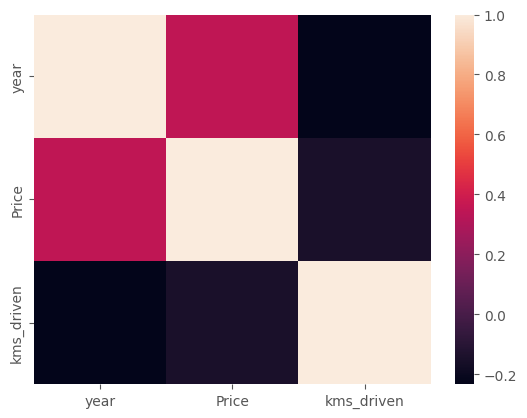

In [24]:
numerical_cols=carData.select_dtypes(exclude=['object']).columns
sns.heatmap(carData[numerical_cols].corr())

#### finds unique element and return them in array form in the company column.

In [25]:
carData['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

#### Plotting company against the price

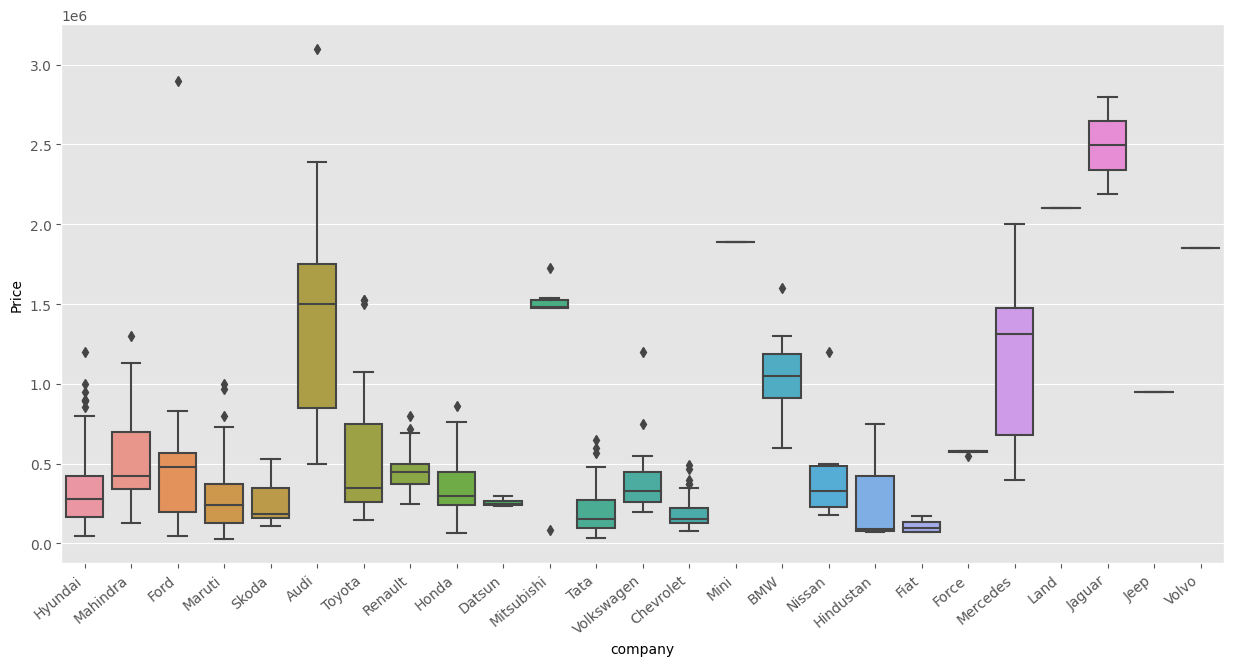

In [26]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=carData)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

#### Plottting year against price

C:\Users\sharv\AppData\Local\Temp\ipykernel_2820\2828691335.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


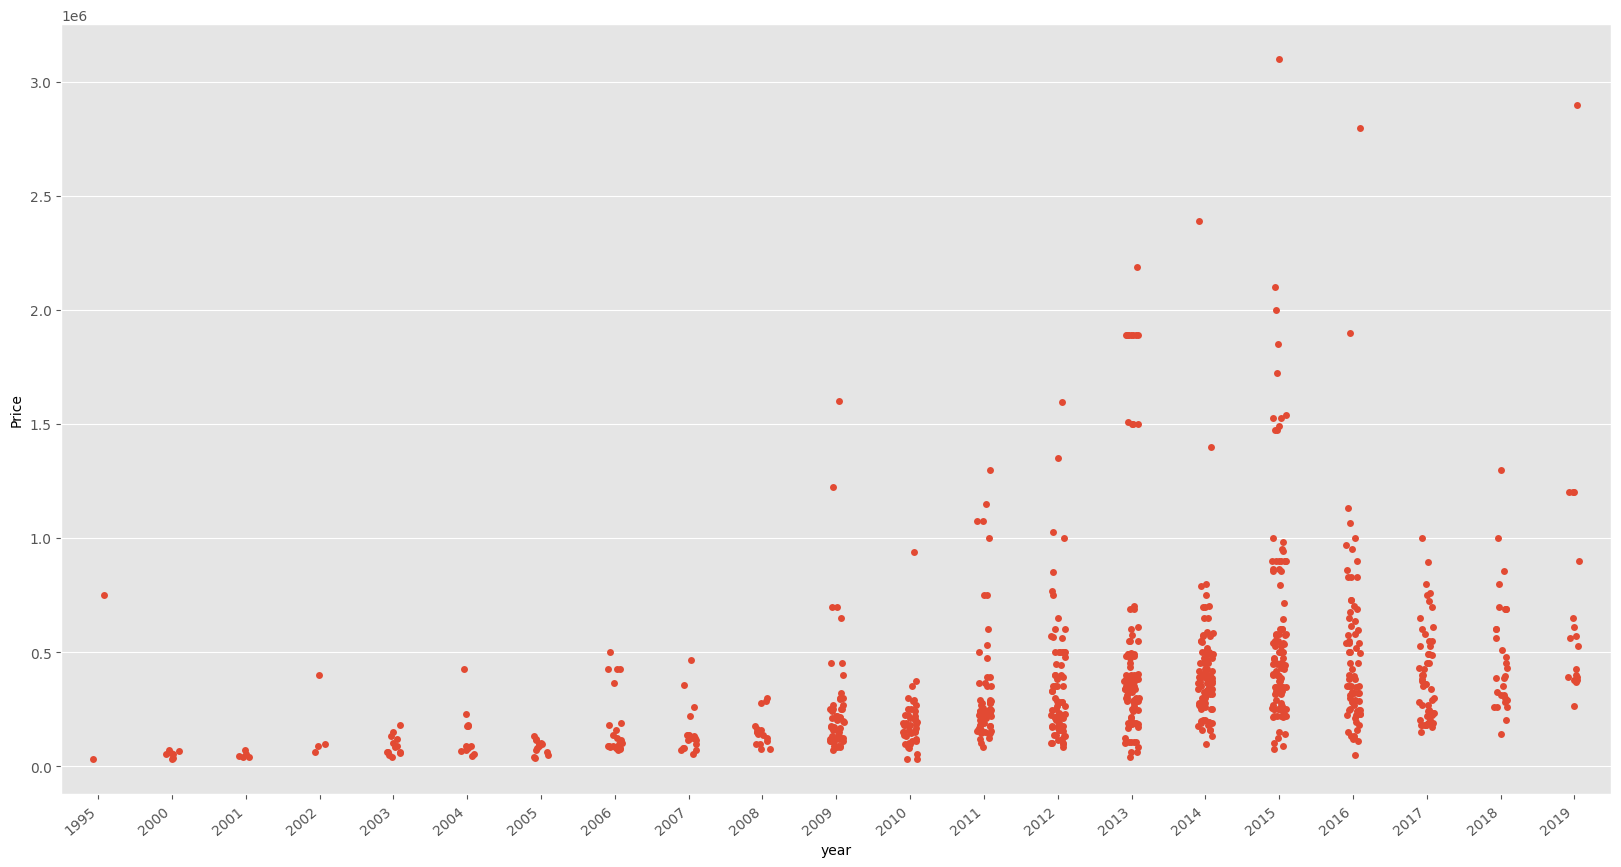

In [27]:
plt.subplots(figsize=(20,10))
ax=sns.stripplot(x='year',y='Price',data=carData)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

#### Plotting kilometer driven against the price.

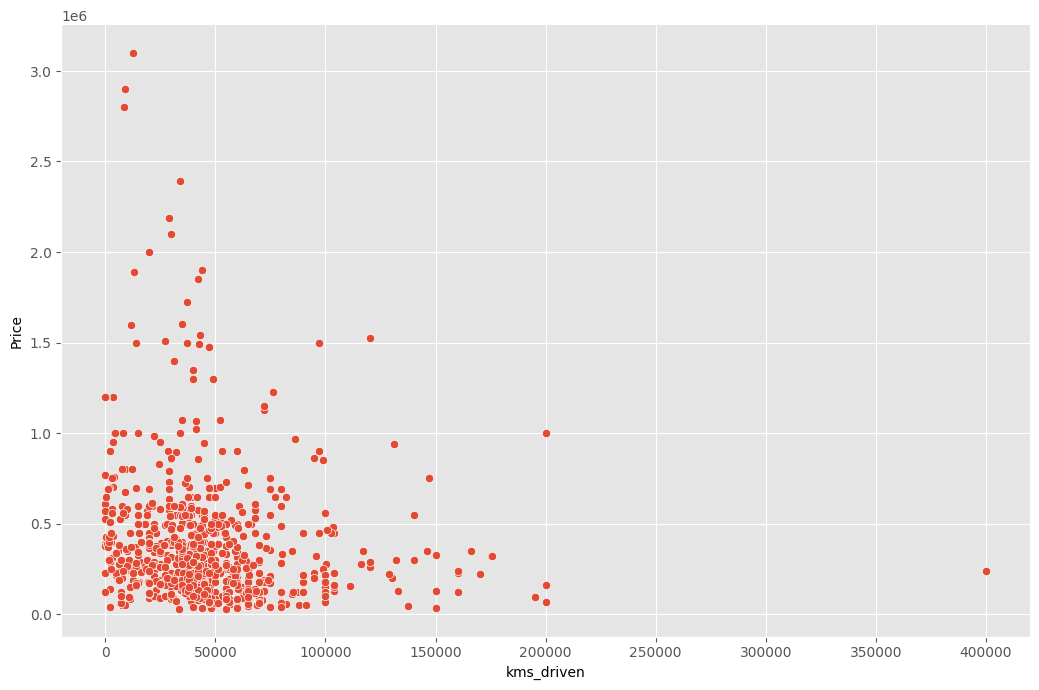

In [28]:
sns.relplot(x='kms_driven',y='Price',data=carData,height=7,aspect=1.5)

#### Plottng fuel type against the price

<Axes: xlabel='fuel_type', ylabel='Price'>

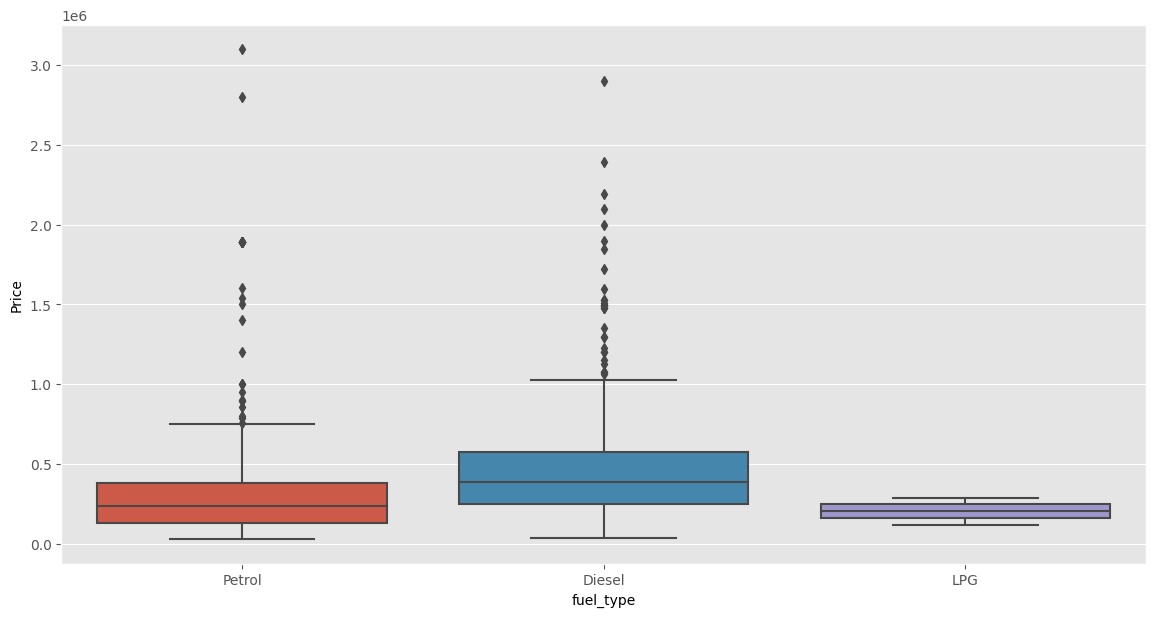

In [29]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=carData)

### Plotting company against price and fuel type 

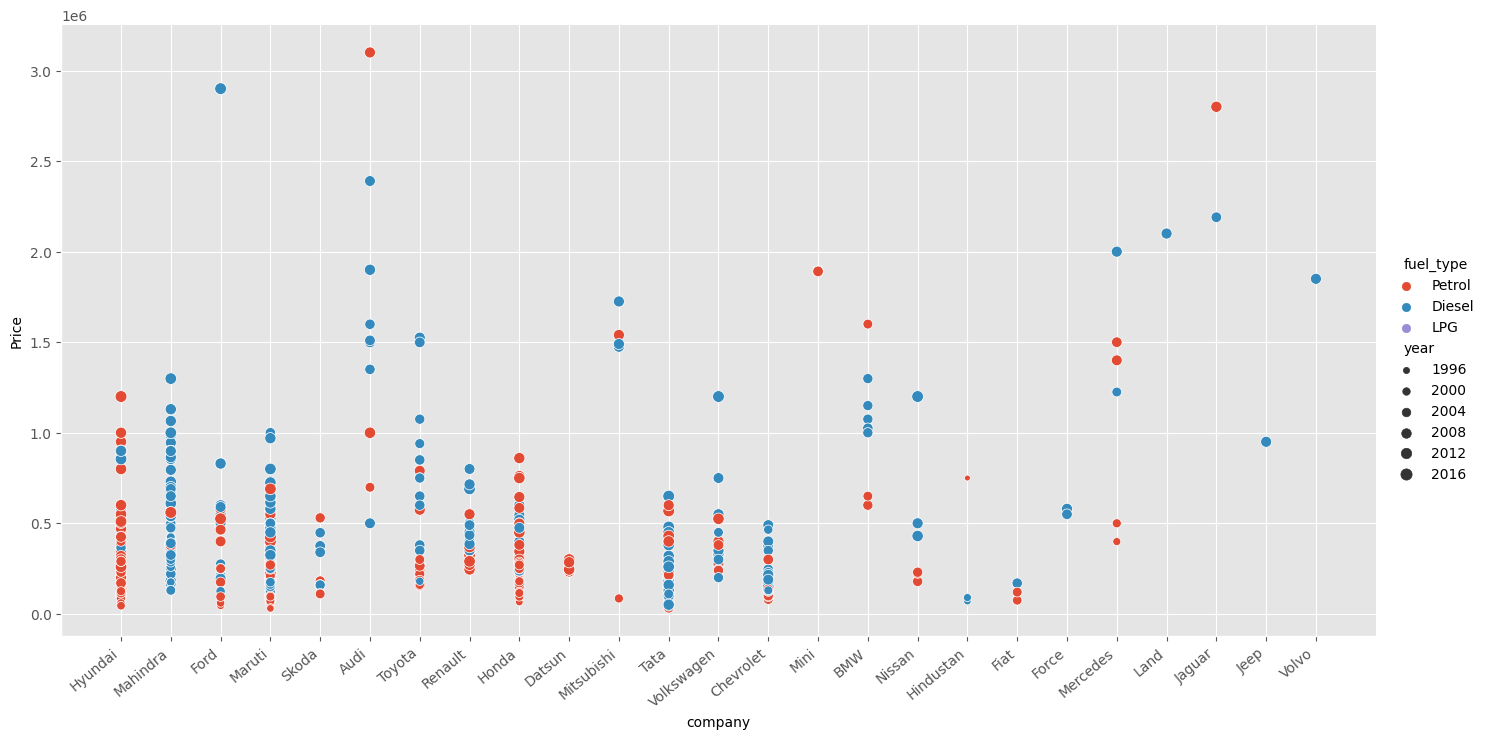

In [30]:
ax=sns.relplot(x='company',y='Price',data=carData,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

## Data Training

In [31]:
X=carData[['name','company','year','kms_driven','fuel_type']]
y=carData['Price']

In [32]:
X

name   company  year  kms_driven fuel_type
0       Hyundai Santro Xing   Hyundai  2007       45000    Petrol
1       Mahindra Jeep CL550  Mahindra  2006          40    Diesel
2         Hyundai Grand i10   Hyundai  2014       28000    Petrol
3    Ford EcoSport Titanium      Ford  2014       36000    Diesel
4                 Ford Figo      Ford  2012       41000    Diesel
..                      ...       ...   ...         ...       ...
811      Maruti Suzuki Ritz    Maruti  2011       50000    Petrol
812          Tata Indica V2      Tata  2009       30000    Diesel
813    Toyota Corolla Altis    Toyota  2009      132000    Petrol
814            Tata Zest XM      Tata  2018       27000    Diesel
815      Mahindra Quanto C8  Mahindra  2013       40000    Diesel

[815 rows x 5 columns]

In [33]:
y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
811    270000
812    110000
813    300000
814    260000
815    390000
Name: Price, Length: 815, dtype: int32

In [34]:
y.shape

(815,)

#### Applying Train Test Split

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#### Creating an OneHotEncoder object to contain all the possible categories

In [37]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

#### Creating a column transformer to transform categorical columns

In [38]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [39]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

#### random state 

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
str="Accuracy = "
print(str,r2_score(y_test,y_pred))

Accuracy =  0.8991157554877304


In [41]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([456670.3272301])

In [42]:
import pickle

In [43]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [44]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([456670.3272301])